<a href="https://colab.research.google.com/github/deepu8900/Object_Detection_Model/blob/main/Object_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install ultralytics opencv-python streamlit matplotlib

  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)


In [10]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

model = YOLO('yolov8l.pt')


In [11]:
def detect_image_debug(image_path, conf_thresh=0.1):
    results = model(image_path, conf=conf_thresh)
    print(results)
    print("Detected classes:", results[0].names)
    if results[0].boxes is not None and len(results[0].boxes) > 0:
        print(f"Number of boxes detected: {len(results[0].boxes)}")
    else:
        print("No boxes detected.")

    annotated_frame = results[0].plot()
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



Saving pexels-thebstudio-947885.jpg to pexels-thebstudio-947885 (1).jpg

image 1/1 /content/pexels-thebstudio-947885 (1).jpg: 512x640 1 scissors, 3033.9ms
Speed: 4.0ms preprocess, 3033.9ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine

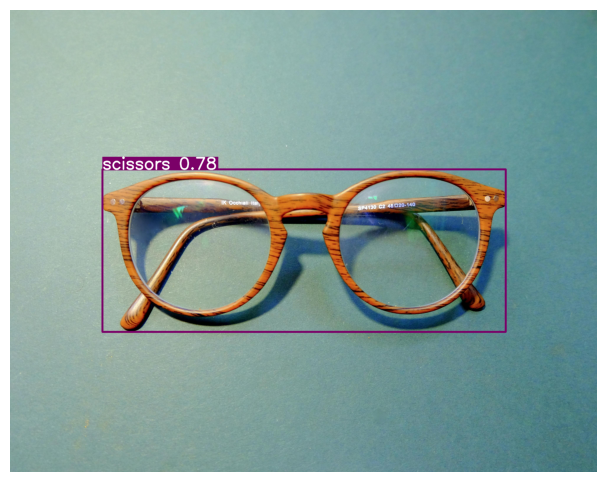

In [12]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    detect_image_debug(filename, conf_thresh=0.1)


In [13]:
def detect_video(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    output_path = '/content/detected_output.mp4'
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        annotated_frame = results[0].plot()
        out.write(annotated_frame)

    cap.release()
    out.release()


In [14]:
uploaded = files.upload()

for filename in uploaded.keys():
    detect_video(filename)


Saving 2385281-hd_1920_1080_24fps.mp4 to 2385281-hd_1920_1080_24fps (1).mp4

0: 384x640 1 person, 2187.1ms
Speed: 3.2ms preprocess, 2187.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2411.5ms
Speed: 3.1ms preprocess, 2411.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1762.4ms
Speed: 2.8ms preprocess, 1762.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1745.1ms
Speed: 3.2ms preprocess, 1745.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 1727.3ms
Speed: 2.8ms preprocess, 1727.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 1739.1ms
Speed: 3.0ms preprocess, 1739.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1752.1ms
Speed: 2.9ms preprocess, 1752.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 

In [15]:
from google.colab import files
files.download('/content/detected_output.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>